#**Código EDA PEC 3 - CREACIÓN DE UNA VISUALIZACIÓN DE DATOS**
#**AUTORA: Mónica García López**

In [ ]:
! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip 


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 22.0 MB 9.3 MB/s 
     |████████████████████████████████| 102 kB 6.5 MB/s 
     |████████████████████████████████| 690 kB 20.5 MB/s 
     |████████████████████████████████| 62 kB 1.3 MB/s 
     |████████████████████████████████| 9.9 MB 42.1 MB/s 
     |████████████████████████████████| 4.7 MB 34.8 MB/s 
     |████████████████████████████████| 296 kB 51.0 MB/s 
  Created wheel for pandas-profiling: filename=pandas_profiling-3.4.0-py2.py3-none-any.whl size=315268 sha256=bbe4c65115890ea25e79c128cd6c553c64c8d88f4edd06995bf515d30ce1987d
  Stored in directory: /tmp/pip-ephem-wheel-cache-qjbf9v64/wheels/cc/d5/09/083fb07c9363a2f45854b0e3a7de7d7c560f07da74b9e9769d
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha256=8dc6a7670e925c4d966864ca03c402285396c721b8acc3832375d8d58da5f1d4
  Stored in directory: /root/.cache/pip/whee

In [ ]:
import pandas as pd
import numpy as np
from pandas_profiling import ProfileReport
import seaborn as sns;
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings('once')


In [ ]:
from google.colab import files # subir archivo
uploaded = files.upload()

Saving movies.csv to movies.csv


In [ ]:
movies_df= pd.read_csv('movies.csv')

In [ ]:
movies_df.head()

,Title,US Gross,Worldwide Gross,US DVD Sales,Production Budget,Release Date,MPAA Rating,Running Time (min),Distributor,Source,Major Genre,Creative Type,Director,Rotten Tomatoes Rating,IMDB Rating,IMDB Votes
0,The Land Girls,146083,146083,NaN,8000000.0,12-Jun-98,R,NaN,Gramercy,NaN,NaN,NaN,NaN,NaN,6.1,1071.0
1,"First Love, Last Rites",10876,10876,NaN,300000.0,7-Aug-98,R,NaN,Strand,NaN,Drama,NaN,NaN,NaN,6.9,207.0
2,I Married a Strange Person,203134,203134,NaN,250000.0,28-Aug-98,NaN,NaN,Lionsgate,NaN,Comedy,NaN,NaN,NaN,6.8,865.0
3,Let's Talk About Sex,373615,373615,NaN,300000.0,11-Sep-98,NaN,NaN,Fine Line,NaN,Comedy,NaN,NaN,13.0,NaN,NaN
4,Slam,1009819,1087521,NaN,1000000.0,9-Oct-98,R,NaN,Trimark,Original Screenplay,Drama,Contemporary Fiction,NaN,62.0,3.4,165.0


## **Estudio de las variables**



**Title** => Título

**US Gross** => Bruto EEUU

**Worldwide Gross** => Bruto mundial

**US DVD Gross** =>

**Production Budget** => Presupuesto de producción

**Release Date** => Fecha de lanzamiento

**MPAA Rating** => Clasificación MPAA

**Running Time(min)** => Duración(min)

**Distributor** => Distribuidor

**Source** => Fuente

**Major Genre** => Género principal

**Creative Type** => Tipo creativo

**Director** => Director

**Rotten Tomatoes Rating** => Calificación de Rotten Tomatoes

**IMDB Rating** => Clasificación IMDB

**IMDB Votes** => Votos de IMDB


In [ ]:
print('El dataset tiene {} observaciones y {} columnas.\n'.format(movies_df.shape[0], movies_df.shape[1]))

El dataset tiene 3201 observaciones y 16 columnas.



In [ ]:
# Tipo de campos
movies_df.dtypes

Title                      object
US Gross                   object
Worldwide Gross            object
US DVD Sales              float64
Production Budget         float64
Release Date               object
MPAA Rating                object
Running Time (min)        float64
Distributor                object
Source                     object
Major Genre                object
Creative Type              object
Director                   object
Rotten Tomatoes Rating    float64
IMDB Rating               float64
IMDB Votes                float64
dtype: object

In [ ]:
#Compruebo si hay valroes perdidos
movies_df.isnull().sum()

Title                        0
US Gross                     0
Worldwide Gross              0
US DVD Sales              2637
Production Budget            1
Release Date                 0
MPAA Rating                605
Running Time (min)        1992
Distributor                232
Source                     365
Major Genre                275
Creative Type              446
Director                  1331
Rotten Tomatoes Rating     880
IMDB Rating                213
IMDB Votes                 213
dtype: int64

##**Modificaciones en campos**


###**Modificaciones en campo "Release Date (Fecha de lanzamiento)"**

* El valor TBD que se refiere a las películas pendientes de estreno. Como para nuestro estudio no las necesito y son sólo 7 filas, las elimino.

* Hay datos que no tienen formato dd-mes-yy como el resto de la columna, les doy el mismo formato para poder trabajar con ellos.

* En los datos que sólo aparece el año, les doy el mismo formato que al resto, indicando el 30-Jun del año que aparece pero con dos dígitos.

* Creo tres campos con cada uno de los datos del campo Release Date utilizando split (cada campo será el que esté separado por el guión). Los campos son: **'Release_Day', 'Release_Month' y 'Release_Year**'

* Como inicialmente el año viene en dos dígitos y me interesan los cuatro, hago una serie de trnasformaciones y creación de columna auxiliar de tal forma que la columna Release_Year tenga los cuatro dígitos que he comentado.

* Procedo a agrupar las películas por año y veo que hay muy pocas entre 1925 y 1969 y posteriores al 2010. Lo que hago es eliminar los registros correspondientes a esos años, **realizando un estudio que comprenda el período 1970-2010.**

In [ ]:
# El campo Release Date tiene el valor TBD que se refiere a las películas pendientes de estreno. Como para nuestro estudio no las necesito y son sólo 7 filas, las elimino.
movies_df[(movies_df["Release Date"] == "TBD")] 

,Title,US Gross,Worldwide Gross,US DVD Sales,Production Budget,Release Date,MPAA Rating,Running Time (min),Distributor,Source,Major Genre,Creative Type,Director,Rotten Tomatoes Rating,IMDB Rating,IMDB Votes
267,Drei,0,0,NaN,7200000.0,TBD,NaN,NaN,NaN,NaN,NaN,NaN,Tom Tykwer,NaN,NaN,NaN
571,The Magic Flute,0,0,NaN,27000000.0,TBD,NaN,NaN,Here Films,NaN,NaN,NaN,Kenneth Branagh,NaN,6.4,499.0
824,Sea Rex 3D: Journey to a Prehistoric World,0,0,NaN,5000000.0,TBD,NaN,NaN,3D Entertainment,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1339,"Story of Bonnie and Clyde, The",0,0,NaN,20000000.0,TBD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1377,Barney's Version,0,0,NaN,30000000.0,TBD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1891,Hannibal the Conqueror,0,0,NaN,50000000.0,TBD,NaN,NaN,Sony Pictures,Based on Book/Short Story,NaN,Dramatization,Vin Diesel,NaN,NaN,NaN
2007,I Come with the Rain,0,627422,NaN,18000000.0,TBD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.2,618.0


In [ ]:
# Elimino las 7 filas del campo "Release Date" cuyo valor es "TBD"
movies_df = movies_df.drop(movies_df[movies_df["Release Date"] == "TBD"].index) 

In [ ]:
print('El dataset tiene {} observaciones y {} columnas.\n'.format(movies_df.shape[0], movies_df.shape[1])) # Una vez eliminadas las filas TBD

El dataset tiene 3194 observaciones y 16 columnas.



In [ ]:

# Hay datos que no tienen formato dd-mes-yy como el resto de la columna, les doy el mismo formato para poder trabajar con ellos
movies_df["Release Date"] = movies_df["Release Date"].replace(['April, 1965','April, 1986', 'June, 1979','March, 1987','01-jun-79'],['01-Apr-65','01-Apr-86','01-Jun-79','01-Mar-87','01-Jun-79'])

In [ ]:
# En los datos que sólo aparece el año, les doy el mismo formato que al resto, indicando el 30-Jun del año que aparece pero con dos dígitos 
movies_df["Release Date"] = movies_df["Release Date"].replace(['1929','1930','1931','1934','1938','1939','1940','1942','1944','1945','1946','1947','1948','1949','1952','1954','1956','1957','1959','1960','1961','1963','1967','1968','1969','1970','1971','1972','1973','1975','1976','1977','1978','1979','1980','1981','1987','1991','1993','2004','2006','2008'],
                                  ['30-Jun-29','30-Jun-30','30-Jun-31','30-Jun-34','30-Jun-38','30-Jun-39','30-Jun-40','30-Jun-42','30-Jun-44','30-Jun-45','30-Jun-46','30-Jun-47','30-Jun-48','30-Jun-49','30-Jun-52','30-Jun-54','30-Jun-56','30-Jun-57','30-Jun-59','30-Jun-60','30-Jun-61','30-Jun-63','30-Jun-67','30-Jun-68','30-Jun-69',
                                   '30-Jun-70','30-Jun-71','30-Jun-72','30-Jun-73','30-Jun-75','30-Jun-76','30-Jun-77','30-Jun-78','30-Jun-79','30-Jun-80','30-Jun-81','30-Jun-87','30-Jun-91','30-Jun-93','30-Jun-04','30-Jun-06','30-Jun-07'])


In [ ]:
# Compruebo que ya no estás estos valores en la columna movies_df["Release Date"]
movies_df[(movies_df["Release Date"] == "April, 19")]
movies_df[(movies_df["Release Date"] == "1929")]

,Title,US Gross,Worldwide Gross,US DVD Sales,Production Budget,Release Date,MPAA Rating,Running Time (min),Distributor,Source,Major Genre,Creative Type,Director,Rotten Tomatoes Rating,IMDB Rating,IMDB Votes


In [ ]:
# Creo tres campos con cada uno de los datos del campo release con split (cada campo será el que esté separado por guión)
movies_df[['Release_Day','Release_Month','Release_Year']]=movies_df["Release Date"].str.split('-',expand=True)

In [ ]:
movies_df.isnull().sum() # Para comprobar nulos

Title                        0
US Gross                     0
Worldwide Gross              0
US DVD Sales              2630
Production Budget            1
Release Date                 0
MPAA Rating                598
Running Time (min)        1985
Distributor                228
Source                     359
Major Genre                268
Creative Type              440
Director                  1327
Rotten Tomatoes Rating     873
IMDB Rating                208
IMDB Votes                 208
Release_Day                  0
Release_Month                0
Release_Year                 0
dtype: int64

In [ ]:
# Me creo un campo auxiliar en el que voy a meter los datos del campo Release_Year, conviendo el typo object a int (primero le tengo que convertir en string)
movies_df["Release_Year_aux"] = movies_df["Release_Year"].astype(str).astype(int)

In [ ]:
# Como el año sólo viene con los últimos dos dígitos y necesito que ponga el año completo, me creo una nueva columna en el dataframe con los valores 1900 o 2000 
# en función del valor de la columna Release_Year. La condición es que si el valor es mayor de 23, doy por hecho que se refiere al año 1923, por lo que pongo 1900 y si es menor, es del año 2000
import numpy as np
movies_df ["Release_Century"] = np.where(movies_df["Release_Year_aux"]> 23, 1900, 2000) # Condición en la que crea un nuevo campo a partir de la condición 


In [ ]:
#Uno los campos "Release_Year" y "Release_Century" y así tengo la columna con el año en formato yyyy, que es lo que necesito para trabajar con mis datos
movies_df["Release_Year"] = movies_df["Release_Year_aux"] + movies_df["Release_Century"] 

In [ ]:
# MOSTRAR TRES CAMPOS
movies_df[["Release_Year", "Release_Century","Release_Year_aux"]]

,Release_Year,Release_Century,Release_Year_aux
0,1998,1900,98
1,1998,1900,98
2,1998,1900,98
3,1998,1900,98
4,1998,1900,98
...,...,...,...
3196,2008,2000,8
3197,2007,2000,7
3198,2006,2000,6
3199,2005,2000,5


In [ ]:
# Muestro agrupados los titulos por año. Así se puede valorar el eliminar los registros de algunos años
peli_year = movies_df[['Release_Year']].groupby ('Release_Year').size()
peli_year

Release_Year
1925     2
1927     1
1929     1
1930     1
1931     1
        ..
2010    92
2011     2
2015     1
2016     2
2020     1
Length: 86, dtype: int64

In [ ]:
# Como no hay muchos registros desde el año 2010, los elimino, de modo que el estudio lo haremos del perídodo 1970 al 2010
movies_df = movies_df.drop(movies_df[movies_df["Release_Year"] > 2010].index)


In [ ]:
# Meto en una variable los indices de los registros correspondeintes a las peliculas estrenadas entre 1925 y 1969. Una vez que los tengo, elimino los registros por medio de su indice
elimina_index = movies_df[(movies_df.Release_Year >= 1925) & (movies_df.Release_Year < 1970)].index
elimina_index

Int64Index([   9,   10,   11,   12,   16,   18,   19,   24,   25,   33,
            ...
            1004, 1023, 1026, 1028, 1034, 1037, 1045, 1047, 1050, 1055],
           dtype='int64', length=140)

In [ ]:
# Elimino los registros en función de sus indices
movies_df.drop(elimina_index, inplace = True)

In [ ]:
# Mostrar dataframe con dos condiciones
#ejemplo_doscondiciones = movies_df[(movies_df.Release_Year >= 1925) & (movies_df.Release_Year < 1970)]

In [ ]:
movies_df.head(3)

,Title,US Gross,Worldwide Gross,US DVD Sales,Production Budget,Release Date,MPAA Rating,Running Time (min),Distributor,Source,...,Creative Type,Director,Rotten Tomatoes Rating,IMDB Rating,IMDB Votes,Release_Day,Release_Month,Release_Year,Release_Year_aux,Release_Century
0,The Land Girls,146083,146083,NaN,8000000.0,12-Jun-98,R,NaN,Gramercy,NaN,...,NaN,NaN,NaN,6.1,1071.0,12,Jun,1998,98,1900
1,"First Love, Last Rites",10876,10876,NaN,300000.0,7-Aug-98,R,NaN,Strand,NaN,...,NaN,NaN,NaN,6.9,207.0,7,Aug,1998,98,1900
2,I Married a Strange Person,203134,203134,NaN,250000.0,28-Aug-98,NaN,NaN,Lionsgate,NaN,...,NaN,NaN,NaN,6.8,865.0,28,Aug,1998,98,1900


###**Modificaciones en campo "Production Budget"**

* En la película Baby Mama nos falta el presupuesto de producción (Production Budget). Lo he buscado en internet (concretamente en la wikipedia) y lo añado a nuestro dataframe. Son 30 millones de USD

In [ ]:
# Me paso los nulos del campo a una variable 
Pb_null = movies_df[movies_df['Production Budget'].isnull()]
Pb_null

,Title,US Gross,Worldwide Gross,US DVD Sales,Production Budget,Release Date,MPAA Rating,Running Time (min),Distributor,Source,...,Creative Type,Director,Rotten Tomatoes Rating,IMDB Rating,IMDB Votes,Release_Day,Release_Month,Release_Year,Release_Year_aux,Release_Century
1271,Baby Mama,60494212,64391484,24304275.0,NaN,25-Apr-08,PG-13,99.0,Universal,Original Screenplay,...,Contemporary Fiction,NaN,63.0,6.1,16128.0,25,Apr,2008,8,2000


In [ ]:
# En la película Baby Mama nos falta el presupuesto de producción (Production Budget). Lo he buscado en internet (concretamente en la wikipedia) 
# y lo añado a nuestro dataframe. Son 30 millones de USD
movies_df["Production Budget"] = movies_df["Production Budget"].replace(np.nan,30000000)

In [ ]:
movies_df[movies_df['Title']=='Baby Mama']

,Title,US Gross,Worldwide Gross,US DVD Sales,Production Budget,Release Date,MPAA Rating,Running Time (min),Distributor,Source,...,Creative Type,Director,Rotten Tomatoes Rating,IMDB Rating,IMDB Votes,Release_Day,Release_Month,Release_Year,Release_Year_aux,Release_Century
1271,Baby Mama,60494212,64391484,24304275.0,30000000.0,25-Apr-08,PG-13,99.0,Universal,Original Screenplay,...,Contemporary Fiction,NaN,63.0,6.1,16128.0,25,Apr,2008,8,2000


###**Modificaciones en los campos "Major Genre" y "Creative Type"**

Convierto los valores nan de los campos indicados a **Untyped**

In [ ]:
movies_df["Major Genre"] = movies_df["Major Genre"].replace(np.nan,"Untyped")
movies_df["Creative Type"] = movies_df["Creative Type"].replace(np.nan,"Untyped")

###**Modificaciones en el campo "Worldwide Gross"**

* El campo Worldwide Gross tiene 4 registros cuyo valor es **Unknown**. Los elimino para poder efectuar cálculos. No me interesa ponerlos a cero porque voy a utilizar el campo para calcular la rentabilidad y con ese valor se me desvirtuarían los resultados de esos registros. 

* Por la razón expuesta anteriormente, procedo a eliminar los registros cuyo valor es 0.0. Son 34 registros.

* Realizo conversión del campo tipo Object a Float.

In [ ]:
# Elimino las filas cuyo valor es "Unknown" para poder realizar el cálculo del beneficio
movies_df[movies_df["Worldwide Gross"] == "Unknown"]

,Title,US Gross,Worldwide Gross,US DVD Sales,Production Budget,Release Date,MPAA Rating,Running Time (min),Distributor,Source,...,Creative Type,Director,Rotten Tomatoes Rating,IMDB Rating,IMDB Votes,Release_Day,Release_Month,Release_Year,Release_Year_aux,Release_Century
118,Bananas,Unknown,Unknown,NaN,2000000.0,28-Apr-71,PG-13,NaN,MGM,Original Screenplay,...,Untyped,Woody Allen,89.0,7.1,12415.0,28,Apr,1971,71,1900
254,Damnation Alley,Unknown,Unknown,NaN,17000000.0,21-Oct-77,NaN,NaN,NaN,NaN,...,Untyped,NaN,NaN,4.7,1655.0,21,Oct,1977,77,1900
266,Death Race 2000,Unknown,Unknown,NaN,300000.0,1-Apr-75,R,NaN,NaN,Based on Book/Short Story,...,Science Fiction,NaN,84.0,6.1,10015.0,1,Apr,1975,75,1900
1025,Waterloo,Unknown,Unknown,NaN,25000000.0,1-Jan-70,NaN,NaN,NaN,NaN,...,Untyped,NaN,NaN,NaN,NaN,1,Jan,1970,70,1900


In [ ]:
# Elimino las filas del campo "Worldwide Gross" cuyo valor es "Unknown" para poder realizar el cálculo del beneficio
movies_df = movies_df.drop(movies_df[movies_df["Worldwide Gross"] == "Unknown"].index) 

In [ ]:
  # Es de tipo object y la convierto a float para poder calcular el beneficio de la pelíula
#movies_df["Worldwide Gross"] = movies_df["Worldwide Gross"].astype(str)

In [ ]:
 # Es de tipo object y la convierto a float para poder calcular el beneficio de la pelíula
movies_df["Worldwide Gross"] = movies_df["Worldwide Gross"].astype(float)

In [ ]:
# Para calcular el beneficio el campo "Worldwide Gross" no puede estar a cero, ya que si no, no nos daría los datos de forma correcta.
movies_df[movies_df["Worldwide Gross"] == 0.0]

,Title,US Gross,Worldwide Gross,US DVD Sales,Production Budget,Release Date,MPAA Rating,Running Time (min),Distributor,Source,...,Creative Type,Director,Rotten Tomatoes Rating,IMDB Rating,IMDB Votes,Release_Day,Release_Month,Release_Year,Release_Year_aux,Release_Century
21,1776,0,0.0,NaN,4000000.0,9-Nov-72,PG,NaN,Sony/Columbia,Based on Play,...,Historical Fiction,NaN,57.0,7.0,4099.0,9,Nov,1972,72,1900
94,Big Things,0,0.0,NaN,50000.0,31-Dec-09,NaN,NaN,NaN,NaN,...,Untyped,NaN,NaN,NaN,NaN,31,Dec,2009,9,2000
123,The Blood of My Brother: A Story of Death in Iraq,0,0.0,NaN,120000.0,30-Jun-06,NaN,NaN,Lifesize Entertainment,Based on Real Life Events,...,Factual,NaN,71.0,7.6,90.0,30,Jun,2006,6,2000
147,Batman - The Movie,0,0.0,NaN,1377800.0,21-Aug-01,NaN,NaN,NaN,NaN,...,Untyped,NaN,NaN,NaN,NaN,21,Aug,2001,1,2000
162,Crop Circles: Quest for Truth,0,0.0,NaN,600000.0,23-Aug-02,NaN,NaN,NaN,NaN,...,Untyped,NaN,60.0,7.1,153.0,23,Aug,2002,2,2000
211,Crying With Laughter,0,0.0,NaN,820000.0,31-Dec-09,NaN,NaN,NaN,NaN,...,Untyped,NaN,NaN,NaN,NaN,31,Dec,2009,9,2000
305,Fetching Cody,0,0.0,NaN,1500000.0,17-Mar-06,NaN,NaN,NaN,Original Screenplay,...,Science Fiction,NaN,NaN,6.7,535.0,17,Mar,2006,6,2000
457,Iraq for Sale: The War Profiteers,0,0.0,NaN,775000.0,8-Sep-06,NaN,NaN,NaN,Based on Real Life Events,...,Factual,NaN,100.0,7.8,854.0,8,Sep,2006,6,2000
498,The Kings of Appletown,0,0.0,NaN,7000000.0,12-Dec-08,NaN,NaN,NaN,Original Screenplay,...,Contemporary Fiction,NaN,NaN,NaN,NaN,12,Dec,2008,8,2000
583,My Beautiful Laundrette,0,0.0,NaN,400000.0,01-Apr-86,NaN,NaN,Orion Classics,NaN,...,Untyped,Stephen Frears,NaN,6.9,5381.0,01,Apr,1986,86,1900


In [ ]:
# Hay 34 filas que tienen como valor cero, asi que las elimino de mi dataset, ya que no representan ni el 1,5% del total de los datos
movies_df = movies_df.drop(movies_df[movies_df["Worldwide Gross"] == 0.0].index) 

In [ ]:
movies_df[movies_df["Worldwide Gross"] == 0.0]

,Title,US Gross,Worldwide Gross,US DVD Sales,Production Budget,Release Date,MPAA Rating,Running Time (min),Distributor,Source,...,Creative Type,Director,Rotten Tomatoes Rating,IMDB Rating,IMDB Votes,Release_Day,Release_Month,Release_Year,Release_Year_aux,Release_Century


###**Modificaciones en el campo "IMDB Rating" y "IMDB Votes"** 

* Como voy a trabajar con este campo, lo exploro para calcular los nan que tiene y, si no son muchos, los susutituyo por 0

* Hay 191 filas que tienen el valor NaN, por lo que procedo a sustituirlo en ámbas columnas por 0.0, ya que el tipo de datos de ámbos campos es float64.  Como el total del dataset contiene 3146 registros, ésto supone un 6% de los registros. Aunque es un porcentaje moderado, considero que es importante utilizar estos campos, así que efectuaré la sustitución. No obstante, realizaré las pruebas pertinentes por si me diese unos resultados que no se pudiesen presentar.


In [ ]:
movies_df['IMDB Rating'].dtypes

dtype('float64')

In [ ]:
movies_df['IMDB Rating'] = movies_df['IMDB Rating'].replace(np.nan,0)

In [ ]:
Pb_null = movies_df[movies_df['IMDB Rating'].isnull()]
Pb_null

,Title,US Gross,Worldwide Gross,US DVD Sales,Production Budget,Release Date,MPAA Rating,Running Time (min),Distributor,Source,...,Creative Type,Director,Rotten Tomatoes Rating,IMDB Rating,IMDB Votes,Release_Day,Release_Month,Release_Year,Release_Year_aux,Release_Century


In [ ]:
movies_df['IMDB Votes'] = movies_df['IMDB Votes'].replace(np.nan,0)

In [ ]:
Pb_null1 = movies_df[movies_df['IMDB Votes'].isnull()]
Pb_null1

,Title,US Gross,Worldwide Gross,US DVD Sales,Production Budget,Release Date,MPAA Rating,Running Time (min),Distributor,Source,...,Creative Type,Director,Rotten Tomatoes Rating,IMDB Rating,IMDB Votes,Release_Day,Release_Month,Release_Year,Release_Year_aux,Release_Century


##**Creación de nuevos campos**



###**Creación del campo Profitability(Rentabilidad)**

* Dado que tenemos la información del coste de la producción ("Production Budget") y los ingresos obtenidos por cada película ("Worlwide Gross") podemos calcular la rentabilidad de cada película. Para ello creo el campo **'Profitability'** que contendrá la rentabilidad de cada película. El cálculo que voy a realizar es es siguiente: 

     Profitability = Worldwide Gross / Production Budget

* Una vez realizada la operación correspondiente me encuentro con tres valores anómalos (outliers) que voy a mantener como excepcionales.

In [ ]:
movies_df["Profitability"] = movies_df["Worldwide Gross"]/movies_df["Production Budget"]

In [ ]:
movies_df["Profitability"].describe()

count     3010.000000
mean        11.619652
std        257.493439
min          0.000125
25%          0.690946
50%          1.766019
75%          3.787730
max      12918.030200
Name: Profitability, dtype: float64

In [ ]:
movies_df[movies_df["Profitability"] == 12918.030200]

,Title,US Gross,Worldwide Gross,US DVD Sales,Production Budget,Release Date,MPAA Rating,Running Time (min),Distributor,Source,...,Director,Rotten Tomatoes Rating,IMDB Rating,IMDB Votes,Release_Day,Release_Month,Release_Year,Release_Year_aux,Release_Century,Profitability
2526,Paranormal Activity,107918810,193770453.0,14051496.0,15000.0,25-Sep-09,R,85.0,Paramount Pictures,Original Screenplay,...,Oren Peli,82.0,6.7,53455.0,25,Sep,2009,9,2000,12918.0302


In [ ]:
# Se comprueba que han salido unos cuantos valores elevados, pero no los quito. 
#Quizás éste motivo hará que se tengan que hacer bastantes pruebas para poder obtener las mejores gráficas. 
movies_df["Profitability"].sort_values()

2498        0.000125
282         0.000374
2078        0.000703
2329        0.000828
458         0.000884
            ...     
2758      454.297969
603       498.750000
244      1800.000000
2920     5330.339450
2526    12918.030200
Name: Profitability, Length: 3010, dtype: float64

###**Creación del campo IMDB_Evaluation**

* Es un campo categórico que describe de manera textual como es una película en función del ratio IMDB, y que tendrá los siguientes rangos de valores:

              Rating 0          Sin calificar
              Rating >0 y <=1   Muy mala
              Rating >=2 y <=3  Mala
              Rating >=4 y <=5  Regular
              Rating >=6 y <=7  Buena
              Rating >8         Muy buena

In [ ]:
movies_df[movies_df['IMDB Rating'] == 0.0]

,Title,US Gross,Worldwide Gross,US DVD Sales,Production Budget,Release Date,MPAA Rating,Running Time (min),Distributor,Source,...,Director,Rotten Tomatoes Rating,IMDB Rating,IMDB Votes,Release_Day,Release_Month,Release_Year,Release_Year_aux,Release_Century,Profitability
3,Let's Talk About Sex,373615,373615.0,NaN,300000.0,11-Sep-98,NaN,NaN,Fine Line,NaN,...,NaN,13.0,0.0,0.0,11,Sep,1998,98,1900,1.245383
5,Mississippi Mermaid,24551,2624551.0,NaN,1600000.0,15-Jan-99,NaN,NaN,MGM,NaN,...,NaN,NaN,0.0,0.0,15,Jan,1999,99,1900,1.640344
13,"Tora, Tora, Tora",29548291,29548291.0,NaN,25000000.0,23-Sep-70,NaN,NaN,NaN,NaN,...,Richard Fleischer,NaN,0.0,0.0,23,Sep,1970,70,1900,1.181932
29,Three Kingdoms: Resurrection of the Dragon,0,22139590.0,NaN,20000000.0,3-Apr-08,R,NaN,NaN,Based on Book/Short Story,...,NaN,NaN,0.0,0.0,3,Apr,2008,8,2000,1.106980
45,April Fool's Day,12947763,12947763.0,NaN,5000000.0,27-Mar-86,NaN,NaN,Paramount Pictures,Original Screenplay,...,NaN,31.0,0.0,0.0,27,Mar,1986,86,1900,2.589553
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3182,Yes,396035,661221.0,NaN,1700000.0,24-Jun-05,R,NaN,Sony Pictures Classics,Original Screenplay,...,NaN,NaN,0.0,0.0,24,Jun,2005,5,2000,0.388954
3188,Y Tu Mama Tambien (And Your Mother Too),13649881,33649881.0,NaN,5000000.0,15-Mar-02,R,NaN,IFC Films,Original Screenplay,...,Alfonso Cuaron,NaN,0.0,0.0,15,Mar,2002,2,2000,6.729976
3189,Yu-Gi-Oh,19762690,28762690.0,NaN,20000000.0,13-Aug-04,PG,NaN,Warner Bros.,Based on TV,...,NaN,NaN,0.0,0.0,13,Aug,2004,4,2000,1.438135
3192,Zathura,28045540,58545540.0,22025352.0,65000000.0,11-Nov-05,PG,113.0,Sony Pictures,Based on Book/Short Story,...,Jon Favreau,75.0,0.0,0.0,11,Nov,2005,5,2000,0.900701


In [ ]:
# Para ello me creo una lista con las condiciones y otra con los valores que se le van a asignar en función de que cumpla la condición

from tables import conditions
conditions = [
    (movies_df ['IMDB Rating'] == 0.0),
    (movies_df ['IMDB Rating'] > 0.0)  & (movies_df ['IMDB Rating'] < 2.0),
    (movies_df ['IMDB Rating'] >= 2.0) & (movies_df ['IMDB Rating'] < 4.0),
    (movies_df ['IMDB Rating'] >= 4.0) & (movies_df ['IMDB Rating'] < 6.0),
    (movies_df ['IMDB Rating'] >= 6.0) & (movies_df ['IMDB Rating'] < 8.0),
    (movies_df ['IMDB Rating'] >= 8.0) & (movies_df ['IMDB Rating'] <= 10.0)
]
values = ['Sin calificar','Muy mala','Mala', 'Regular','Buena','Muy buena']

# Pongo el código que realizará la operación de la condición y la inserción del valor correspondiente en la nueva columna del dataframe

movies_df['IMDB Evaluation'] = np.select(conditions, values)

In [ ]:
# Muestro como queda el reparto
movies_df['IMDB Evaluation'].value_counts()

Buena            1636
Regular           884
Sin calificar     183
Muy buena         164
Mala              138
Muy mala            5
Name: IMDB Evaluation, dtype: int64

In [ ]:
movies_df.head()

,Title,US Gross,Worldwide Gross,US DVD Sales,Production Budget,Release Date,MPAA Rating,Running Time (min),Distributor,Source,...,Rotten Tomatoes Rating,IMDB Rating,IMDB Votes,Release_Day,Release_Month,Release_Year,Release_Year_aux,Release_Century,Profitability,IMDB Evaluation
0,The Land Girls,146083,146083.0,NaN,8000000.0,12-Jun-98,R,NaN,Gramercy,NaN,...,NaN,6.1,1071.0,12,Jun,1998,98,1900,0.018260,Buena
1,"First Love, Last Rites",10876,10876.0,NaN,300000.0,7-Aug-98,R,NaN,Strand,NaN,...,NaN,6.9,207.0,7,Aug,1998,98,1900,0.036253,Buena
2,I Married a Strange Person,203134,203134.0,NaN,250000.0,28-Aug-98,NaN,NaN,Lionsgate,NaN,...,NaN,6.8,865.0,28,Aug,1998,98,1900,0.812536,Buena
3,Let's Talk About Sex,373615,373615.0,NaN,300000.0,11-Sep-98,NaN,NaN,Fine Line,NaN,...,13.0,0.0,0.0,11,Sep,1998,98,1900,1.245383,Sin calificar
4,Slam,1009819,1087521.0,NaN,1000000.0,9-Oct-98,R,NaN,Trimark,Original Screenplay,...,62.0,3.4,165.0,9,Oct,1998,98,1900,1.087521,Mala


###**Creación del campo Profitability Evaluation (Rangos)**

---



Es un campo categórico que describe de manera textual como es la rentabilidad de una película en función del campo Profitability. Tendrá los siguientes rangos de valores:

               No rentables
               Poco rentables
               Rentables
               Muy rentables
               Excepcionalmente rentables



In [ ]:
# Para ello me creo una lista con las condiciones y otra con los valores que se le van a asignar en función de que cumpla la condición

from tables import conditions
conditions1 = [
    (movies_df ['Profitability'] >= 0.00) & (movies_df ['Profitability'] < 1.01),
    (movies_df ['Profitability'] >= 1.01) & (movies_df ['Profitability'] < 2.01),
    (movies_df ['Profitability'] >= 2.01) & (movies_df ['Profitability'] < 5.01),
    (movies_df ['Profitability'] >= 5.01) & (movies_df ['Profitability'] < 500),
    (movies_df ['Profitability'] > 500)
    ]
values1 = ['No rentables','Poco rentables','Rentables', 'Muy rentables','Excepcionalmente rentables']

# Pongo el código que realizará la operación de la condición y la inserción del valor correspondiente en la nueva columna del dataframe

movies_df['Profitability Evaluation'] = np.select(conditions1, values1)

In [ ]:
# Muestro como queda el reparto
movies_df['Profitability Evaluation'].value_counts()

No rentables                  1049
Rentables                      824
Poco rentables                 580
Muy rentables                  554
Excepcionalmente rentables       3
Name: Profitability Evaluation, dtype: int64

In [ ]:
movies_df.head(1)

,Title,US Gross,Worldwide Gross,US DVD Sales,Production Budget,Release Date,MPAA Rating,Running Time (min),Distributor,Source,...,IMDB Rating,IMDB Votes,Release_Day,Release_Month,Release_Year,Release_Year_aux,Release_Century,Profitability,IMDB Evaluation,Profitability Evaluation
0,The Land Girls,146083,146083.0,NaN,8000000.0,12-Jun-98,R,NaN,Gramercy,NaN,...,6.1,1071.0,12,Jun,1998,98,1900,0.01826,Buena,No rentables


##**Campos a utilizar**

En primera instancia, y, con el fin de realizar las gráficas, me quedo con los siguientes campos:


**Title** => Título

**Worldwide Gross** => Bruto mundial

**Production Budget** => Presupuesto de producción

**Major Genre** => Género principal

**IMDB Rating** => Clasificación IMDB

**IMDB Votes** => Votos de IMDB

**Release_Month** => Mes de estreno

**Release_Year** => Año de estreno

**Profitability** => Rentabilidad de una película

**IMDB Evaluation** => Evaluación IMDB

**Profitability Evaluation** => Evaluación de la rentabilidad


In [ ]:
movies_def = movies_df[['Title','Worldwide Gross','Production Budget','Major Genre','IMDB Rating','IMDB Votes','Release_Month','Release_Year','Profitability','IMDB Evaluation', 'Profitability Evaluation' ]] 

In [ ]:
movies_def.head(5)

,Title,Worldwide Gross,Production Budget,Major Genre,IMDB Rating,IMDB Votes,Release_Month,Release_Year,Profitability,IMDB Evaluation,Profitability Evaluation
0,The Land Girls,146083.0,8000000.0,Untyped,6.1,1071.0,Jun,1998,0.018260,Buena,No rentables
1,"First Love, Last Rites",10876.0,300000.0,Drama,6.9,207.0,Aug,1998,0.036253,Buena,No rentables
2,I Married a Strange Person,203134.0,250000.0,Comedy,6.8,865.0,Aug,1998,0.812536,Buena,No rentables
3,Let's Talk About Sex,373615.0,300000.0,Comedy,0.0,0.0,Sep,1998,1.245383,Sin calificar,Poco rentables
4,Slam,1087521.0,1000000.0,Drama,3.4,165.0,Oct,1998,1.087521,Mala,Poco rentables


## **Exploración del fichero definitivo con ProfileReport**

* Aquí podemos revisar cada variables con sus características, correlaciones...

In [ ]:
profile_def = ProfileReport(movies_def, title="Movies", html={"style":{"full_width":True}})

In [ ]:
profile_def

Output hidden; open in https://colab.research.google.com to view.

### **Se puede comprobar que los datos que voy a trabajar con Tableau van a proceder de un fichero sin datos faltantes y con un EDA realizado de manera exhaustiva**

In [ ]:
# Compruebo que, efectivamente no lleva nulos
movies_def.isnull().sum()

Title                       0
Worldwide Gross             0
Production Budget           0
Major Genre                 0
IMDB Rating                 0
IMDB Votes                  0
Release_Month               0
Release_Year                0
Profitability               0
IMDB Evaluation             0
Profitability Evaluation    0
dtype: int64

# **GRÁFICAS**

###**Grafico de la evaluación de la rentabilidad por rangos de valores**



In [ ]:
movies_def["Profitability Evaluation"].value_counts()

No rentables                  1049
Rentables                      824
Poco rentables                 580
Muy rentables                  554
Excepcionalmente rentables       3
Name: Profitability Evaluation, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


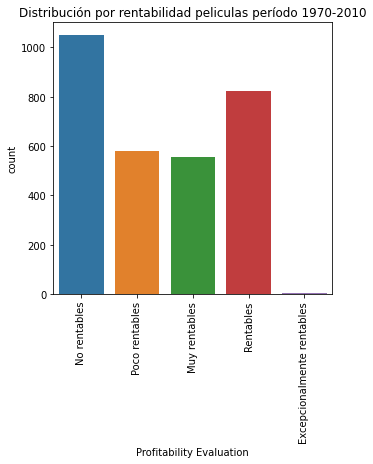

In [ ]:
plt.figure(figsize=(5,5))
sns.countplot(movies_def["Profitability Evaluation"])
plt.title('Distribución por rentabilidad peliculas período 1970-2010')
plt.xticks(rotation=90)
plt.show()


Podemos observar que hay una cantidad mayor de películas que no son rentables o poco rentables que las que si lo son. 

###**Grafico de la distribución de las películas por IMDB**

In [ ]:
movies_def["IMDB Evaluation"].value_counts()

Buena            1636
Regular           884
Sin calificar     183
Muy buena         164
Mala              138
Muy mala            5
Name: IMDB Evaluation, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


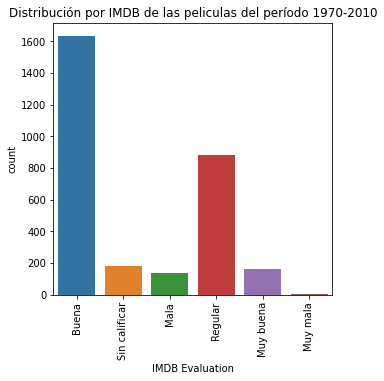

In [ ]:
plt.figure(figsize=(5,5))
sns.countplot(movies_def["IMDB Evaluation"])
plt.title('Distribución por IMDB de las peliculas del período 1970-2010')
plt.xticks(rotation=90)
plt.show()

Como se puede observar, según el ratio IMDB, en nuestro listado hay una mayoría de películas buenas que casi supone la misma cantidad que la suma del resto.

###**Gráfico del promedio de las ganancias y presupuesto en función del género y el mes**

In [ ]:
# Muestro las películas y el promedio de ganancias y presupuesto por género
aux = movies_def.groupby('Major Genre').agg({'Worldwide Gross':'mean','Production Budget':'mean','Title':'count'})


In [ ]:
#aux = aux.reset_index()
aux

,Worldwide Gross,Production Budget,Title
Major Genre,,,
Action,1.463899e+08,5.612250e+07,408
Adventure,2.490643e+08,7.072083e+07,264
Black Comedy,2.356206e+07,1.310714e+07,35
Comedy,7.545703e+07,2.863254e+07,667
Concert/Performance,3.072440e+07,6.100000e+06,5
Documentary,1.747361e+07,4.421908e+06,40
Drama,5.181948e+07,2.307859e+07,765
Horror,6.153555e+07,1.868730e+07,216
Musical,7.651592e+07,2.638312e+07,40


<Figure size 1440x1440 with 0 Axes>

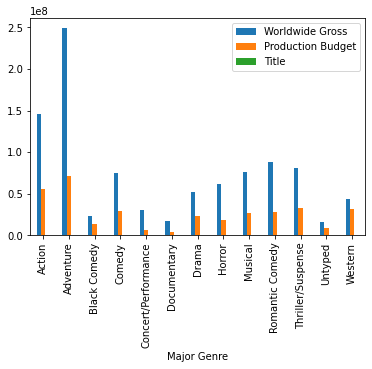

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.figure(figsize=(20,20))
aux.plot(kind='bar')

Se puede observar que las películas que producen un mayor beneficio son las de aventuras, seguidas de las de acción. Mientras que las menos rentables son los documentales y comedia negra.

In [ ]:
aux1 = movies_def.groupby('Release_Month').agg({'Worldwide Gross':'mean','Production Budget':'mean','Title':'count'})
aux1

,Worldwide Gross,Production Budget,Title
Release_Month,,,
Apr,4.153002e+07,2.392443e+07,237
Aug,5.883101e+07,2.723761e+07,272
Dec,1.201014e+08,3.812999e+07,338
Feb,5.852068e+07,2.732161e+07,201
Jan,3.854181e+07,2.109733e+07,150
Jul,1.404262e+08,4.466447e+07,243
Jun,1.296747e+08,4.092347e+07,299
Mar,6.865719e+07,2.788529e+07,242
May,1.718410e+08,4.780096e+07,221


<Figure size 1440x1440 with 0 Axes>

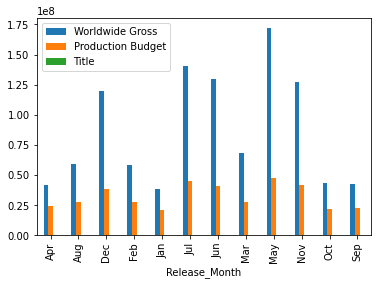

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.figure(figsize=(20,20))
aux1.plot(kind='bar')

Si graficamos por meses, podemos ver que la rentabilidad de las películas estrenadas cuando comienza el buen tiempo (Mayo-Julio) ó se acerca la Navidad (Noviembre-Diciembre) es mayor. Yo creo que es normal, dado que las mejores películas se estrenan en los períodos descritos ya que son muy propicios para ir al cine (por las vacaciones y festivos). 

#**Exportamos el nuevo dataframe a Excel para su tratamiento en Tableau**

In [ ]:
movies_def.to_excel('movies.xlsx', index=False)

In [ ]:

from google.colab import files
files.download ('movies.xlsx')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>